# Regresión lineal

Realizaremos una regresion lineal utilizando la data del arhivo [auto-mpg.data](https://drive.google.com/file/d/1yC8tha9HyjDOomGw2QRwR_pPby4eF5eI/view?usp=sharing)

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!gdown 1W5rCn6i2jmarrnBfVb4KOTX5fWyohfpK

Downloading...
From: https://drive.google.com/uc?id=1W5rCn6i2jmarrnBfVb4KOTX5fWyohfpK
To: /content/auto-mpg.data
100% 30.3k/30.3k [00:00<00:00, 40.5MB/s]


In [ ]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']

data = pd.read_csv("auto-mpg.data", names=column_names,
                   comment='\t', sep=" ", skipinitialspace=True)

data=data[data.Horsepower!="?"]



In [ ]:
data["Horsepower"]=pd.to_numeric(data["Horsepower"])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           392 non-null    float64
 1   Cylinders     392 non-null    int64  
 2   Displacement  392 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        392 non-null    float64
 5   Acceleration  392 non-null    float64
 6   Model Year    392 non-null    int64  
 7   Origin        392 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 27.6 KB


In [ ]:
data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [ ]:
nrow=data.shape[0]
ncol=data.shape[1]

In [ ]:
data.shape

(392, 8)

### Variable a predecir

In [ ]:
y=data["MPG"]
y

,MPG
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0
...,...
393,27.0
394,44.0
395,32.0
396,28.0


### Variables predictivas

In [ ]:
X_modelo=data[['Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']]
X_modelo.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,8,307.0,130.0,3504.0,12.0,70,1
1,8,350.0,165.0,3693.0,11.5,70,1
2,8,318.0,150.0,3436.0,11.0,70,1
3,8,304.0,150.0,3433.0,12.0,70,1
4,8,302.0,140.0,3449.0,10.5,70,1


Sklearn para regresión lineal

In [ ]:
from sklearn.linear_model import LinearRegression

mod=LinearRegression().fit(X_modelo, y)

In [ ]:
mod.coef_

array([-0.49337632,  0.01989564, -0.01695114, -0.00647404,  0.08057584,
        0.75077268,  1.4261405 ])

In [ ]:
mod.intercept_

-17.218434622017536

Valores predichos

In [ ]:
y_pred=mod.predict(X_modelo)

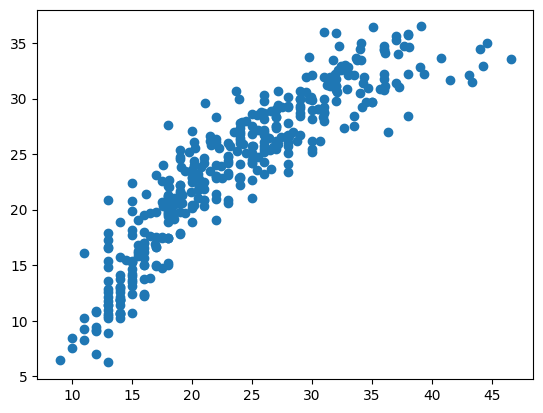

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y, y_pred)
plt.show()

$r^2$

In [ ]:
from sklearn import metrics
metrics.r2_score(y, y_pred)

0.8214780764810599

In [ ]:
np.linalg.norm(y-y_pred)**2

4252.212530440176

## **Ejercicio 1:**

Inicializamos $\beta$ al azar

a) Halla los valores predichos considerando a $\beta$ como los coeficientes de la regresión.

b) Halla el valor de la función objetivo $\dfrac{1}{n}||y-X\beta||^2$ (MSE) para dichos valores de $\beta$

In [ ]:
from scipy.stats import uniform

In [ ]:
beta_inicial=uniform.rvs(size=8)
beta_inicial

array([0.12643204, 0.10803017, 0.88357928, 0.57109284, 0.20596576,
       0.1885741 , 0.65286685, 0.88821035])

a)

In [ ]:
y_pred=beta_inicial[0]+np.matmul(X_modelo, np.transpose(beta_inicial[1:8]))

b)

In [ ]:
residuos=y.to_numpy()-y_pred.to_numpy()

In [ ]:
(1/nrow)*np.linalg.norm(residuos)**2

850140.8400837651

## **Ejercicio 2:**

El gradiente de la función objetivo es
$$-\dfrac{2}{n}X^t(y-X\beta)$$
Halla el vector gradiente para los valores de $\beta$ del ejercicio anterior.

In [ ]:
grad_0=(-2/nrow)*np.sum(residuos)
grad_0

1751.8553913031628

In [ ]:
grad_1_p=(-2/nrow)*np.matmul(np.transpose(X_modelo), residuos)
grad_1_p

,0
Cylinders,1.049875e+04
Displacement,3.990866e+05
Horsepower,2.030363e+05
Weight,5.700069e+06
Acceleration,2.645354e+04
Model Year,1.323753e+05
Origin,2.484779e+03


# Estandarización

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler_X=StandardScaler()

X_stand=scaler_X.fit_transform(X_modelo)

In [ ]:
np.mean(X_stand[:,0])

-1.0875654118777043e-16

In [ ]:
np.std(X_stand[:,0])

1.0

In [ ]:
y=data[["MPG"]]
scaler_Y=StandardScaler()

y_stand=scaler_Y.fit_transform(y)

In [ ]:
np.std(y_stand)

1.0

In [ ]:
beta=np.random.normal(loc=0, scale=1, size=7) # Esta lista no incluye al c0

In [ ]:
y_hat=np.matmul(X_stand, np.transpose(beta))

In [ ]:
r=y_stand.flatten()-y_hat # usamos flatten para convertir ambos a arreglos unidimensionales

In [ ]:
R=(1/nrow)*np.linalg.norm(r)**2
R

0.9545590741054818

In [ ]:
grad=(-2/nrow)*np.matmul(np.transpose(X_stand), r)
grad

array([-0.61448449, -0.45193782, -0.02262571, -0.39380187, -0.49720543,
       -0.74391348, -0.25238643])

In [ ]:
alpha=0.01
beta=beta-alpha*grad
beta

array([-0.88144119, -0.89471128,  0.36887752, -0.20368533, -0.45735751,
       -0.11793061, -0.44858961])

In [ ]:
y_hat=np.matmul(X_stand, np.transpose(beta))
r=y_stand.flatten()-y_hat
R=(1/nrow)*np.linalg.norm(r)**2
R

0.938677606971602

Gradiente descendiente


In [ ]:
epsilon=10**-8
alpha=0.1
valores=[]
beta=np.random.normal(loc=0, scale=1, size=7)
tol=epsilon+1
while tol>epsilon:
  #gradiente
  y_hat=np.matmul(X_stand, np.transpose(beta))
  r=y_stand.flatten()-y_hat
  grad=(-2/nrow)*np.matmul(np.transpose(X_stand), r)

  #funcion objetivo
  R=(1/nrow)*np.linalg.norm(r)**2
  valores.append(R)

  #actualizacion
  beta=beta-alpha*grad
  tol=np.linalg.norm(alpha*grad)

beta

array([-0.10782665,  0.26674543, -0.08359598, -0.70455625,  0.0284814 ,
        0.35434286,  0.14718516])

In [ ]:
import matplotlib.pyplot as plt

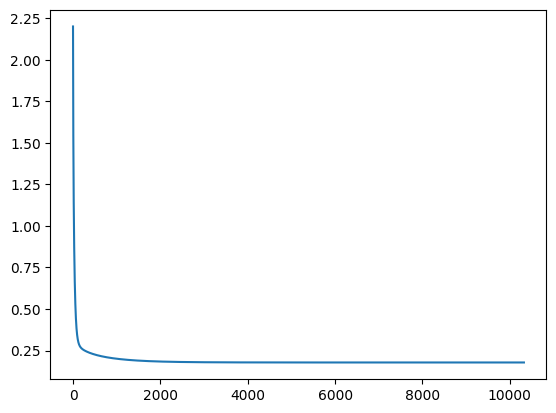

In [ ]:
plt.plot(valores)

In [ ]:
scaler_X.scale_

array([1.70360611e+00, 1.04510444e+02, 3.84420327e+01, 8.48318447e+02,
       2.75534291e+00, 3.67903490e+00, 8.04490081e-01])

In [ ]:
scaler_Y.scale_

array([7.79504576])

In [ ]:
beta*(scaler_Y.scale_)/scaler_X.scale_

array([-0.49337326,  0.01989555, -0.01695109, -0.00647404,  0.08057576,
        0.75077265,  1.4261395 ])

In [ ]:
#sklearn
mod.coef_

array([-0.49337632,  0.01989564, -0.01695114, -0.00647404,  0.08057584,
        0.75077268,  1.4261405 ])